In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
import os

zip_file_path = "/content/drive/MyDrive/archive (2).zip"
extract_dir = "/content"

if os.path.exists(zip_file_path):
    try:
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)
        print("Zip file extracted successfully.")
    except Exception as e:        print(f"Error extracting zip file: {e}")
else:
    print("Zip file not found.")

Zip file extracted successfully.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import glob
import cv2
import tensorflow as tf

In [5]:
train = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"

In [6]:
size = 224 #pixel size

In [7]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 90,
    width_shift_range = 0.0,
    height_shift_range = 0.0,
    shear_range = 0.0,
    zoom_range = 0.0,
    horizontal_flip = False,
    vertical_flip = False,
    rescale = 1./255,
    preprocessing_function = None,
    validation_split = 0.1,
).flow_from_directory(
    train,
    batch_size = 164,
    target_size = (size,size),
    subset = "training",
    color_mode = "rgb",
    class_mode = "categorical",
    shuffle = True,
    seed = 42
)

Found 63282 images belonging to 38 classes.


In [8]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

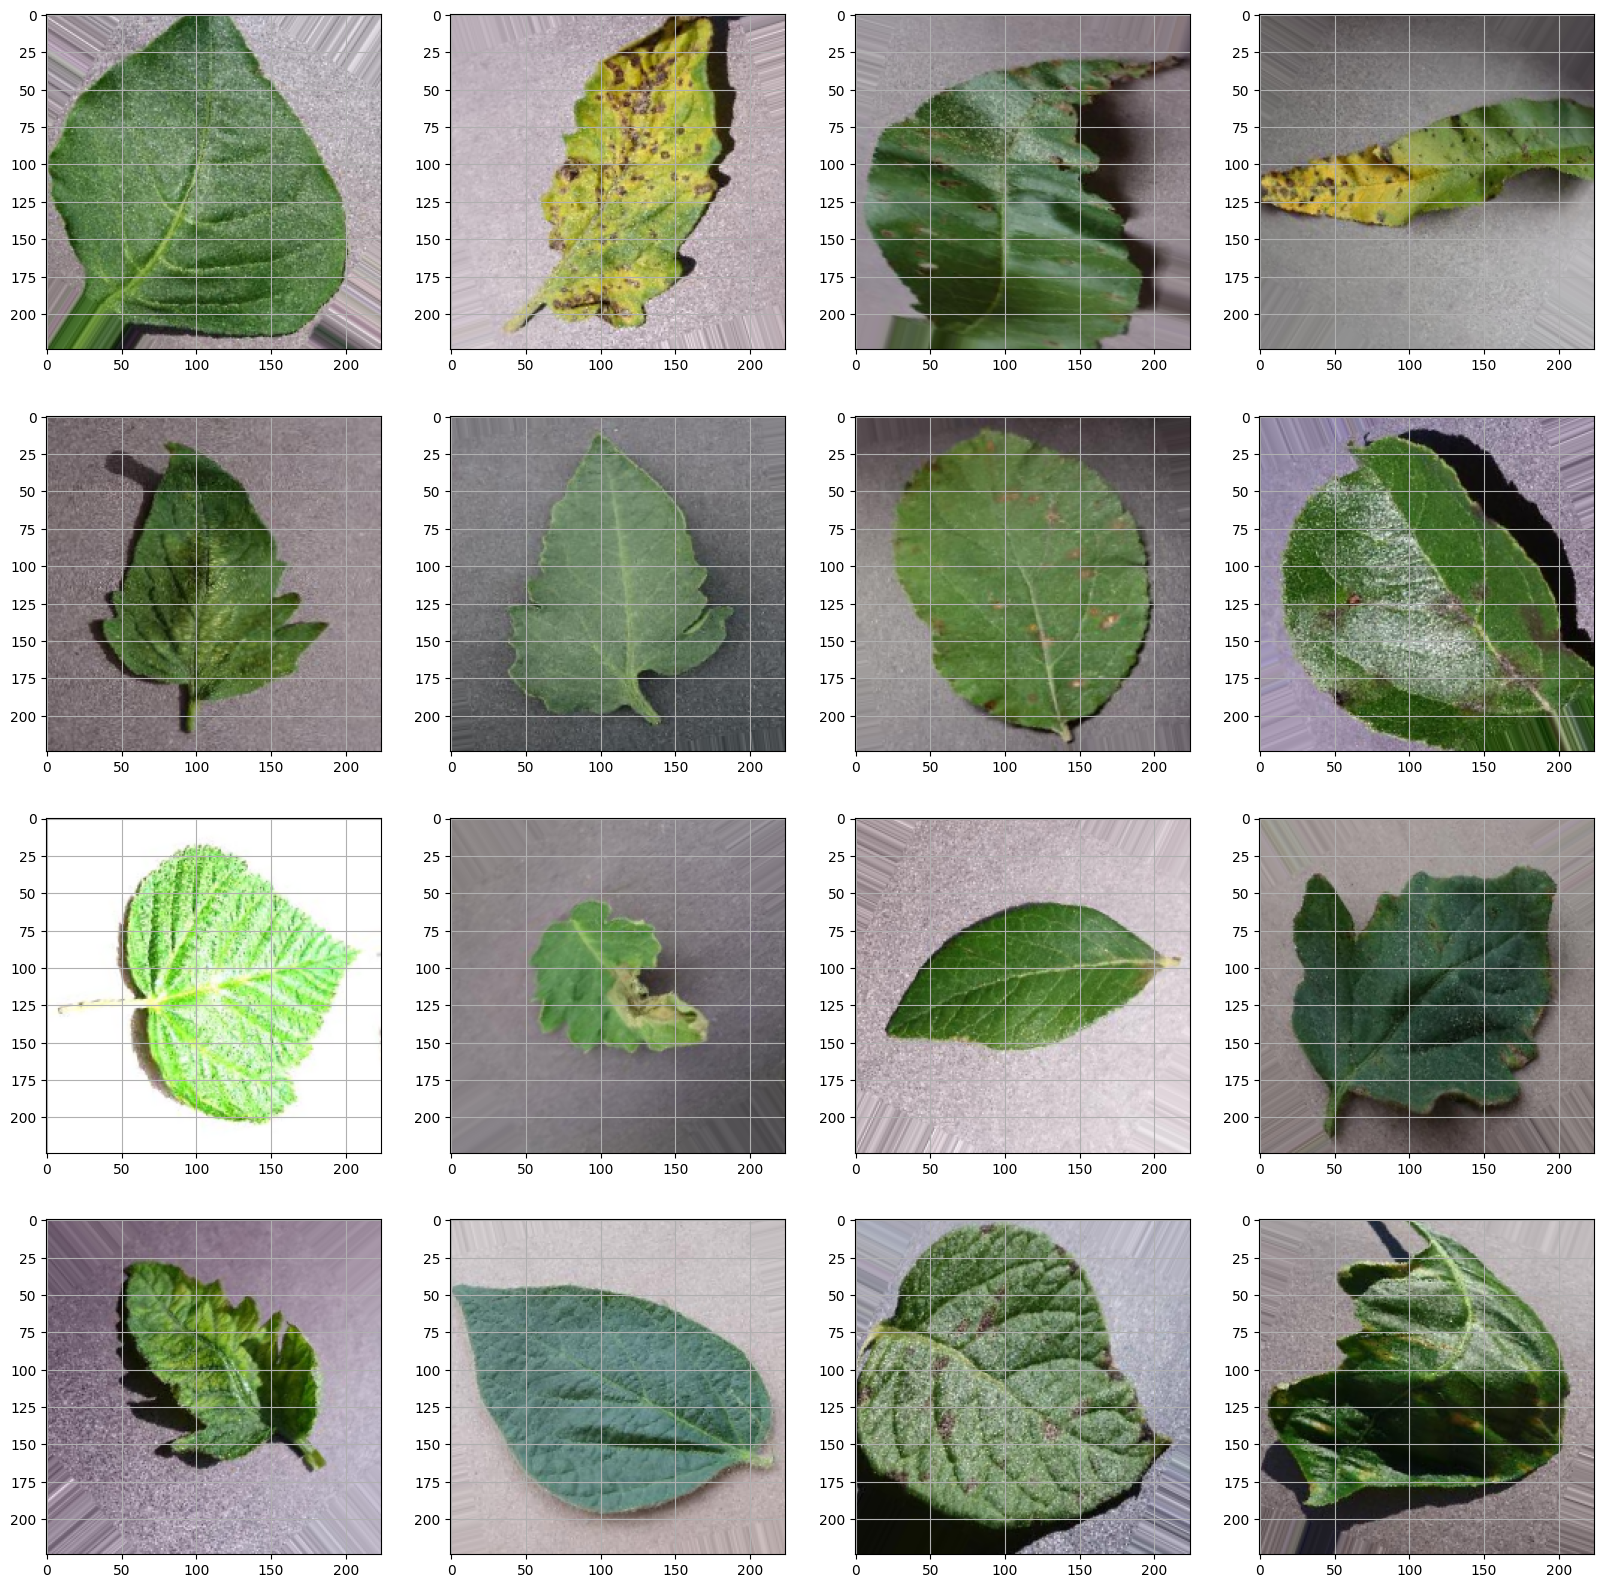

In [9]:
classes  = list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch,y_batch in train_generator:
  for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_batch[i])
    plt.grid(None)
  plt.show()
  break


In [10]:
valid = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

In [11]:
valid_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    preprocessing_function = None,
    validation_split = 0.1,
).flow_from_directory(
    valid,
    batch_size = 164,
    target_size = (size,size),
    subset = "validation",
    color_mode = "rgb",
    class_mode = "categorical",
    shuffle = False
)

Found 1742 images belonging to 38 classes.


In [12]:
test = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

In [13]:
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    preprocessing_function = None,
).flow_from_directory(
    test,
    batch_size = 164,
    target_size = (size,size),
    color_mode = "rgb",
    class_mode = "categorical",
    shuffle = False
)

Found 17572 images belonging to 38 classes.


In [14]:
test_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [15]:
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=7,strides=1,padding="same", activation='relu',name="Conv1", input_shape=(size, size, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=2,name="Pool1"))
model.add(keras.layers.Conv2D(64, kernel_size=5 ,strides=1,padding="same", activation='relu',name="Conv2"))
model.add(keras.layers.MaxPooling2D(pool_size=2,name="Pool2"))
model.add(keras.layers.Conv2D(128, kernel_size=3,strides=1,padding="same", activation='relu',name="Conv3"))
model.add(keras.layers.Conv2D(256, kernel_size=3,strides=1,padding="same", activation='relu',name="Conv4"))
model.add(keras.layers.MaxPooling2D(pool_size=2,name="Pool3"))
model.add(keras.layers.Flatten(name="Flatten1"))
model.add(keras.layers.Dense(128, activation='relu',name="Dense1"))
model.add(keras.layers.Dense(64, activation='relu',name="Dense2"))
tf.keras.layers.Dropout(0.5)
model.add(keras.layers.Dense(38, activation='softmax',name="Output"))
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                  │ (None, 224, 224, 32)   │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool1 (MaxPooling2D)            │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 112, 112, 64)   │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool2 (MaxPooling2D)            │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3 (Conv2D)                  │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv4 (Conv2D)                  │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool3 (MaxPooling2D)            │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten1 (Flatten)              │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │    25,690,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 38)             │         2,470 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,125,990 (99.66 MB)

 Trainable params: 26,125,990 (99.66 MB)

 Non-trainable params: 0 (0.00 B)

None


In [16]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss',patience=15, restore_best_weights=True)
model_ReduceLROnPlateau = ReduceLROnPlateau(monitor='val_loss',patience=10,factor=0.1,min_lr=0.00001)
model_checkpoint = ModelCheckpoint('best_model.keras',monitor='val_loss',save_best_only=True)

callbacks = [early_stopping,model_ReduceLROnPlateau,model_checkpoint]

In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy','precision','recall'])

In [18]:
history = model.fit(train_generator,epochs=15,validation_data=valid_generator,callbacks=callbacks)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
386/386 ━━━━━━━━━━━━━━━━━━━━ 941s 2s/step - accuracy: 0.2534 - loss: 2.8827 - precision: 0.6015 - recall: 0.1161 - val_accuracy: 0.5838 - val_loss: 1.4219 - val_precision: 0.7299 - val_recall: 0.4701 - learning_rate: 0.0010
Epoch 2/15
386/386 ━━━━━━━━━━━━━━━━━━━━ 877s 2s/step - accuracy: 0.6885 - loss: 1.0082 - precision: 0.8174 - recall: 0.5803 - val_accuracy: 0.7543 - val_loss: 0.7824 - val_precision: 0.8323 - val_recall: 0.6952 - learning_rate: 0.0010
Epoch 3/15
386/386 ━━━━━━━━━━━━━━━━━━━━ 828s 2s/step - accuracy: 0.8079 - loss: 0.6056 - precision: 0.8721 - recall: 0.7537 - val_accuracy: 0.8502 - val_loss: 0.4622 - val_precision: 0.8938 - val_recall: 0.8209 - learning_rate: 0.0010
Epoch 4/15
386/386 ━━━━━━━━━━━━━━━━━━━━ 823s 2s/step - accuracy: 0.8629 - loss: 0.4334 - precision: 0.8996 - recall: 0.8312 - val_accuracy: 0.8502 - val_loss: 0.4686 - val_precision: 0.8853 - val_recall: 0.8284 - learning_rate: 0.0010
Epoch 5/15
386/386 ━━━━━━━━━━━━━━━━━━━━ 824s 2s/step - accur

In [23]:
import seaborn as sns
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

precision = history.history['precision']
val_precision = history.history['val_precision']

recall = history.history['recall']
val_recall = history.history['val_recall']

loss= history.history['loss']
val_loss= history.history['val_loss']

epochs = range(1, len(loss)+1)


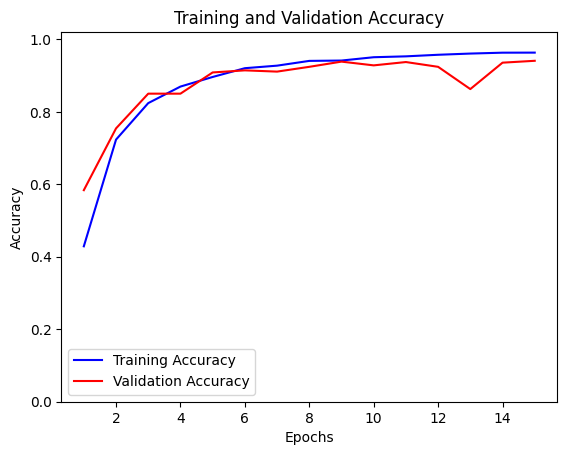

In [24]:
plt.plot(epochs, acc, color='blue', label='Training Accuracy')
plt.plot(epochs, val_acc, color='red', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0,1.02)
plt.show()

In [25]:
model_evaluate = model.evaluate(test_generator)
print('loss : ', model_evaluate[0])
print('accuracy : ', model_evaluate[1])
print('precision : ', model_evaluate[2])
print('recall : ', model_evaluate[3])

108/108 ━━━━━━━━━━━━━━━━━━━━ 39s 358ms/step - accuracy: 0.9552 - loss: 0.1345 - precision: 0.9596 - recall: 0.9509
loss :  0.17216238379478455
accuracy :  0.9441156387329102
precision :  0.9524855613708496
recall :  0.9377418756484985


In [27]:
#to save it
model.save('PDDS.keras')